# Ted Data Analysis

In [1]:
from IPython.display import Image
Image(url='TED.gif') 

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from scipy import stats 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### TED Dataset

In [3]:
df = pd.read_csv('dataset/ted_main.csv')

### Features Available

* **name**: The official name of the TED Talk. Includes the title and the speaker.
* **title**: the title of the talk.
* **description**: A blurb of what the talk is about.
* **main_speaker**: The first named speaker of the talk.
* **speaker_occupation**: The occupation of the main speaker.
* **num_speaker**: The number of speakers in the talk.
* **duration**: The duration of the talk in seconds.
* **event**: The TED/TEDx event where the talk took place.
* **film_data**: The Unix timestamp of the filming.
* **published_data**: The Unix timestamp for the publication of the talk on TED.com
* **comments**: The number of first level commnets made on the talk.
* **tags**: The themes associated with the talk.
* **languages**: The number of languages in which the talk is available.
* **ratings**: A stringfied dictionary of the various ratings given to the talk.
* **related_talks**: A list of dictionaries of recommended talks to watch next.
* **url**: The URL of talk.
* **views**: The number of views on the talk

In [4]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Reorder the columns

In [5]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 
         'duration', 'event', 'film_date', 'published_date', 
         'comments', 'tags', 'languages', 'ratings', 'related_talks', 
         'url', 'views']]


Convert timestamps into a human readable format

In [6]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [7]:
df['published_date'].iloc[0]

'27-06-2006'

These represent all the talks that have ever been posted on the TED Platform until september 21, 2017.

In [8]:
len(df)

2550

### Most Viewed talks all the time

15 most viewed TED talks of all time. The number of views gives us a good idea of the popularity of the TED talk.

In [9]:
ted_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values(by = 'views', ascending = False)[:15]

In [10]:
ted_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


* Ken Robinson's talk on **Do Schools kill creativity?** is the most popular TED Talks of all time with 47.2 million views?
* Robinson's talk is closely followed by Amy Cuddy's talk on **Your Body Language May Shape Who You Are**.

In [11]:
sns.set_style('whitegrid')

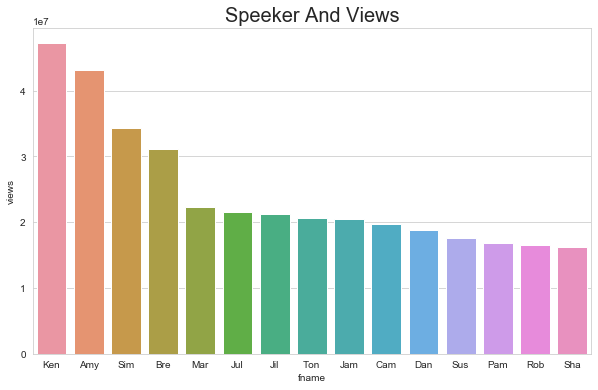

In [12]:
ted_talks['fname'] = ted_talks['main_speaker'].apply(lambda x : x[:3])
plt.figure(figsize = (10, 6))
plt.title('Speeker And Views', fontsize = 20)
sns.barplot(x = 'fname', y = 'views', data = ted_talks)

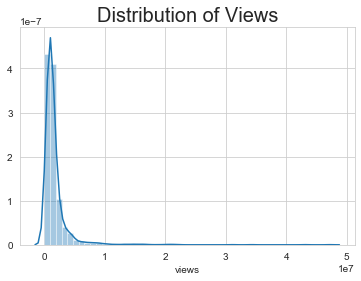

In [13]:
plt.title('Distribution of Views', fontsize = 20)
sns.distplot(df['views'])

In [14]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks is **1.6 miilion** and the median number of views is **1.12 million**. This suggests a very high average level of popularity of TED Talks. 

### Comments 

In [15]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

* On average, there are **191.5 comments** on every TED Talk.
* There is a **huge standard deviation** associated with the comments.
* The minumum number of comments on a talk is **2** and maximum is **6404**. 

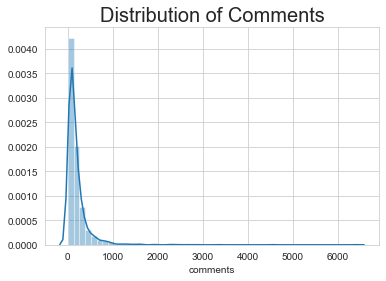

In [16]:
plt.title('Distribution of Comments', fontsize = 20)
sns.distplot(df['comments'])

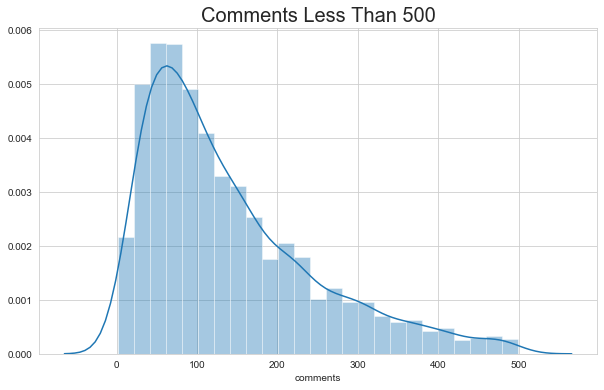

In [17]:
plt.figure(figsize = (10, 6))
plt.title('Comments Less Than 500', fontsize = 20)
sns.distplot(df[df['comments']<500]['comments'])

From the plot above, we can see that bulk of the talks have **fewer than 500 comments**. The mean obtained has been heavily influences by outliers.

If the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let's find out.

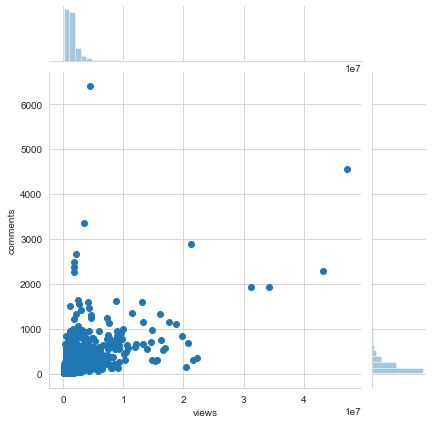

In [18]:
sns.jointplot(x = 'views', y = 'comments', data = df)

In [19]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


As the scatterplot and the correlation matrix show, the pearson coefficient is slightly **more than 0.5**. This result was pretty expected.
Let us now check the number of views and comments on the 10 most commented TED Talks of all the time. 

In [20]:
df[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending = False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on **Militant Atheism'** generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list.

we will define a new feature discussion quotient which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [21]:
df['discussion_quo'] = df['comments']/df['views']

In [22]:
df[['title', 'main_speaker', 'views', 'comments', 'discussion_quo', 'film_date']].sort_values('discussion_quo', ascending = False).head(10)

,title,main_speaker,views,comments,discussion_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


The most discuss talk is **The case for same sex marriage**.

### Analysing TED Talks by the month and the year.

In [23]:
df['month'] = df['film_date'].apply(lambda x: sorted(x.split('-'))[0])

In [24]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

[Text(0, 0.5, 'Number of talks'), Text(0.5, 0, 'Months')]

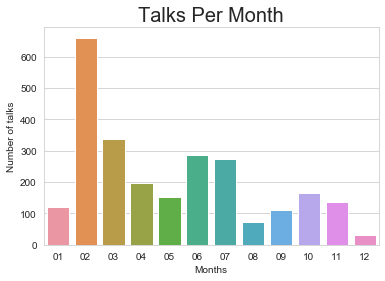

In [25]:
plt.title('Talks Per Month', fontsize = 20)
s = sns.barplot(x='month', y='talks', data = month_df)
s.set(xlabel = 'Months', ylabel = 'Number of talks')

**February** is the most popular month for TED confrences whereas **August** and **December** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.